In [1]:
# Import Packages

import os
import numpy as np
import spectral.io.envi as envi
from spectral import *

In [2]:
# Functions

def find_path_nextcloud():
    # Bestimmung des aktuellen Pfads
    current_path = os.path.abspath(os.getcwd())

    # Der Benutzername der Endgeräte unterscheidet sich
    # Festlegen des Pfads der Nextcloud in Abhängigkeit vom Benutzername
    if 'fgrassxx' in current_path:
        path_nextcloud_fg = open('../Daten_einlesen/path_nextcloud_fgrassxx.txt')
        path_nextcloud = path_nextcloud_fg.read()

    elif 'timo' in current_path:
        path_nextcloud_timo = open('../Daten_einlesen/path_nextcloud_timo.txt')
        path_nextcloud = path_nextcloud_timo.read()

    return path_nextcloud

path_nextcloud = find_path_nextcloud()
path_folder = path_nextcloud + 'Daten_Gyrocopter/Dessau/Hyperspektral/'
file_name = 'Dessau_unsigned_mosaik_all.hdr'

path_file = path_folder + file_name

In [3]:
path_nextcloud = find_path_nextcloud()
path_folder = path_nextcloud + 'Daten_Gyrocopter/Oldenburg/Hyperspektral/'


path_hdr = path_folder + 'Oldenburg-all.hdr'
path_dat =  path_folder + 'Oldenburg-all.dat'

img_his = envi.open(file=path_hdr, image=path_dat)

img_his

	Data Source:   'C:/Users/fgrassxx/Nextcloud/Master_Data_Science/2_Semester/Projekt_Data_Science_1_SS22/Daten_Gyrocopter/Oldenburg/Hyperspektral/Oldenburg-all.dat'
	# Rows:           1980
	# Samples:        3500
	# Bands:           107
	Interleave:        BSQ
	Quantization:  16 bits
	Data format:    uint16

In [4]:
path_folder = path_nextcloud + 'Daten_Gyrocopter/Oldenburg/Thermal/'

path_hdr = path_folder + 'Thermal-Resized.hdr'
path_dat =  path_folder + 'Thermal-Resized'

img_thermal = envi.open(file=path_hdr, image=path_dat)

img_thermal

	Data Source:   'C:/Users/fgrassxx/Nextcloud/Master_Data_Science/2_Semester/Projekt_Data_Science_1_SS22/Daten_Gyrocopter/Oldenburg/Thermal/Thermal-Resized'
	# Rows:           1980
	# Samples:        3500
	# Bands:             1
	Interleave:        BSQ
	Quantization:  32 bits
	Data format:   float32

In [5]:
path_folder = path_nextcloud + 'Daten_Gyrocopter/Oldenburg/DigitalesOberflaechenModel_normiert/'

path_hdr = path_folder + 'DGM-DTM-Resized.hdr'
path_dat =  path_folder + 'DGM-DTM-Resized'

img_dom = envi.open(file=path_hdr, image=path_dat)
img_dom

	Data Source:   'C:/Users/fgrassxx/Nextcloud/Master_Data_Science/2_Semester/Projekt_Data_Science_1_SS22/Daten_Gyrocopter/Oldenburg/DigitalesOberflaechenModel_normiert/DGM-DTM-Resized'
	# Rows:           1980
	# Samples:        3500
	# Bands:             1
	Interleave:        BSQ
	Quantization:  32 bits
	Data format:   float32

In [6]:
small_picture_his = img_his[500:1000,500:1000]

small_picture_thermal = img_thermal[500:1000,500:1000]

small_picture_dom = img_dom[500:1000,500:1000]

In [7]:
combined_small_pictures = np.concatenate((small_picture_his, small_picture_thermal),-1)

combined_small_pictures = np.concatenate((combined_small_pictures, small_picture_dom),-1)

**Vergleiche**

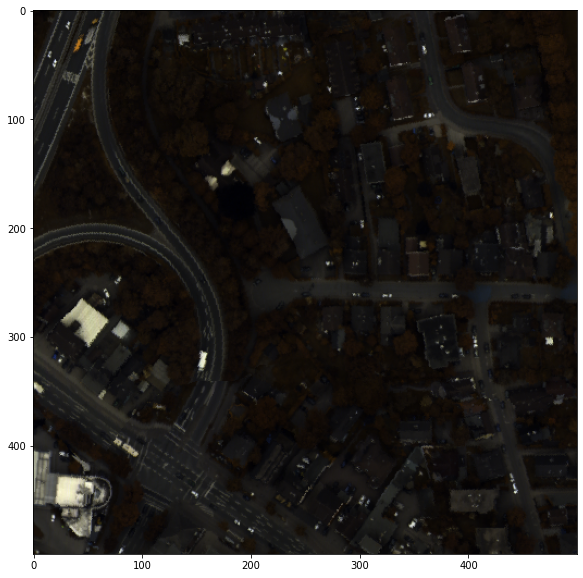

In [8]:
# RGB-Bild aus einzelner Datei
view = imshow(small_picture_his, bands=(27,21,4), figsize=(10,10))

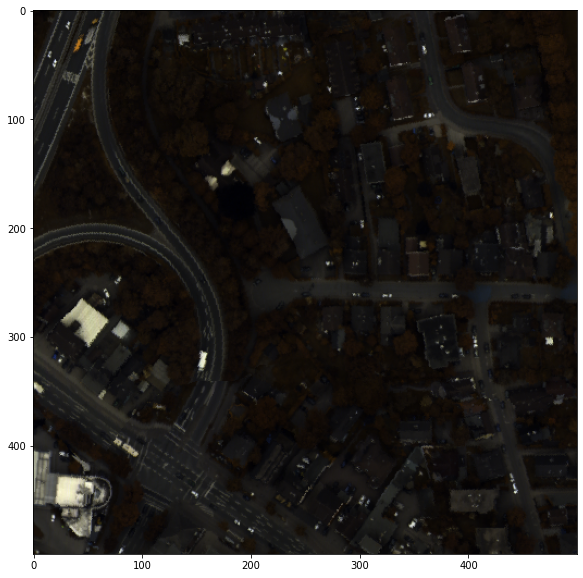

In [9]:
# RGB-Bild aus einzelnem Band der zusammengeführten Datei
view = imshow(combined_small_pictures, bands=(27,21,4), figsize=(10,10))

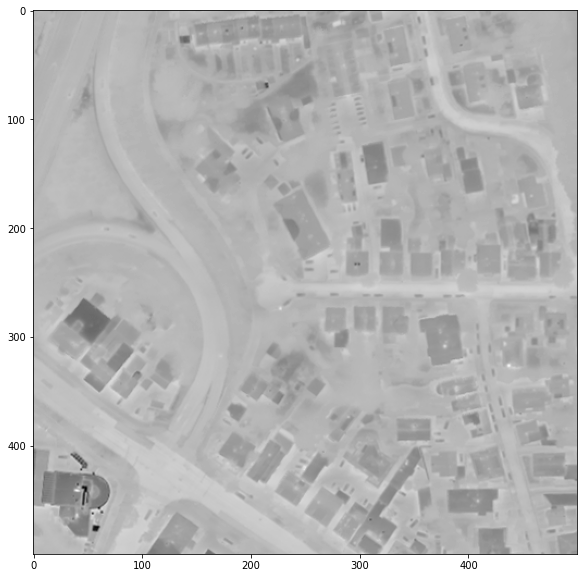

In [10]:
# Thermal-Bild aus einzelner Datei
view = imshow(small_picture_thermal, figsize=(10,10))

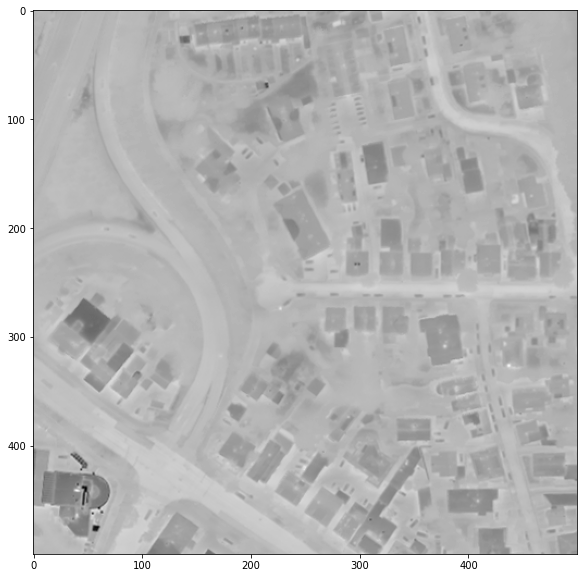

In [11]:
# Thermal-Bild aus einzelnem Band der zusammengeführten Datei
view = imshow(combined_small_pictures[:,:,107], figsize=(10,10))

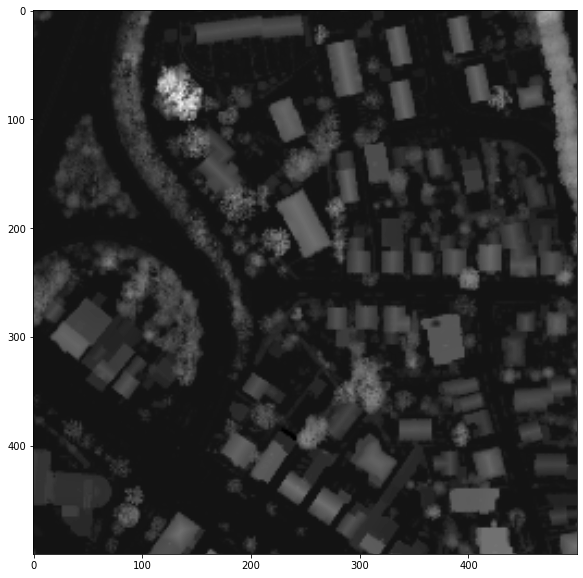

In [12]:
# Höhenmeter-Bild aus einzelner Datei
view = imshow(small_picture_dom, figsize=(10,10))

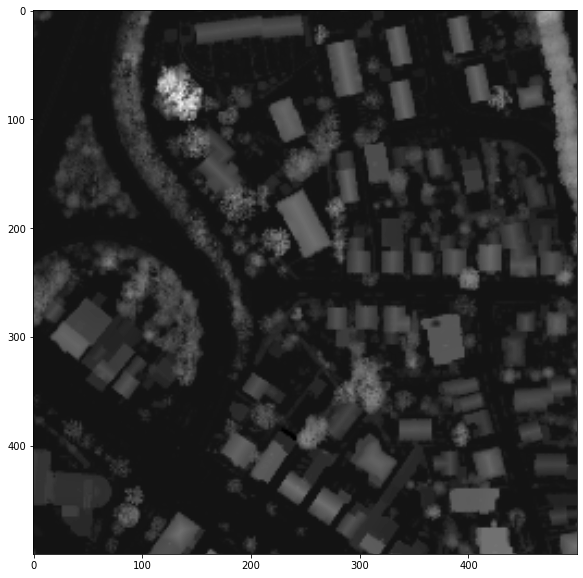

In [13]:
# Höhenmeter-Bild aus einzelnem Band der zusammengeführten Datei
view = imshow(combined_small_pictures[:,:,108], figsize=(10,10))

In [14]:
arr_his = img_his.load()
arr_thermal = img_thermal.load()
arr_dom = img_dom.load()

In [15]:
# Arrays zusammenführen
combined_arr = np.concatenate((arr_his, arr_thermal),-1)
combined_arr = np.concatenate((combined_arr, arr_dom),-1)

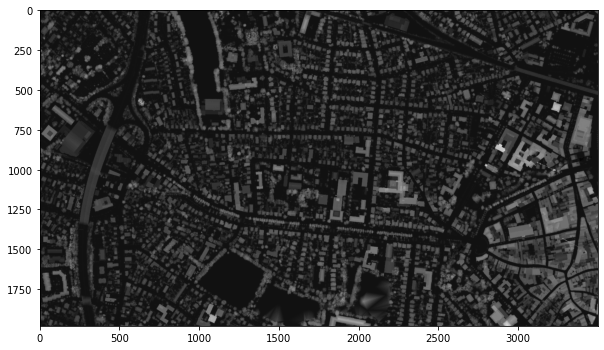

In [16]:
# Höhenmeter-Bild aus einzelner Datei
view = imshow(arr_dom, figsize=(10,10))

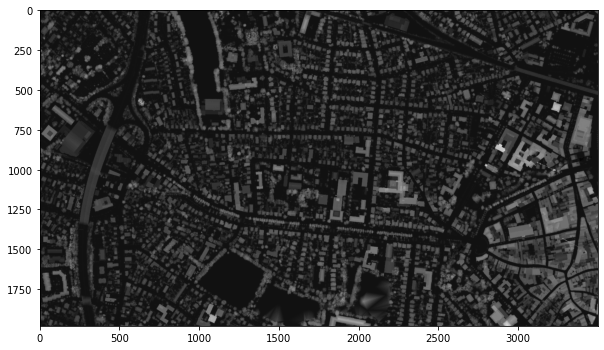

In [17]:
# Höhenmeter-Bild aus einzelnem Band der zusammengeführten Datei
view = imshow(combined_arr[:,:,108], figsize=(10,10))

In [18]:
new_bands = ['thermal', 'dom']
arr_metadata = img_his.metadata

for new_band in new_bands:
    arr_metadata['wavelength'].append(new_band)
    arr_metadata['band names'].append(new_band)
    arr_metadata['fwhm'].append(new_band)

arr_metadata['bands'] = len(arr_metadata['wavelength'])
arr_metadata

{'description': 'File Resize Result, x resize factor: 1.000000, y resize factor: 1.000000.\n[Wed Nov 30 15:22:58 2011]',
 'samples': '3500',
 'lines': '1980',
 'bands': 109,
 'header offset': '0',
 'file type': 'ENVI Standard',
 'data type': '12',
 'interleave': 'bsq',
 'sensor type': 'Unknown',
 'byte order': '0',
 'x start': '4552',
 'y start': '1330',
 'map info': ['UTM',
  '1.000',
  '1.000',
  '445703.140',
  '5888996.723',
  '5.0000000000e-001',
  '5.0000000000e-001',
  '32',
  'North',
  'WGS-84',
  'units=Meters'],
 'default bands': ['75', '54', '32'],
 'wavelength units': 'Unknown',
 'band names': ['Resize (Resize (Mosaic (Band 1):1_to_10_full_mosaic):Aisa-Grosser-Ausschnitt)',
  'Resize (Resize (Mosaic (Band 2):1_to_10_full_mosaic):Aisa-Grosser-Ausschnitt)',
  'Resize (Resize (Mosaic (Band 3):1_to_10_full_mosaic):Aisa-Grosser-Ausschnitt)',
  'Resize (Resize (Mosaic (Band 4):1_to_10_full_mosaic):Aisa-Grosser-Ausschnitt)',
  'Resize (Resize (Mosaic (Band 5):1_to_10_full_mosaic)

In [19]:
from spectral import envi

envi.save_image(hdr_file='combined_arr.hdr', image=combined_arr,
                dtype = "float32", ext='.dat', interleave = 'bsq',
                metadata=arr_metadata, force = True)

In [20]:
path_hdr = 'combined_arr.hdr'
path_dat = 'combined_arr.dat'

img_new = envi.open(file=path_hdr, image=path_dat)

img_new

	Data Source:   '.\combined_arr.dat'
	# Rows:           1980
	# Samples:        3500
	# Bands:           109
	Interleave:        BSQ
	Quantization:  16 bits
	Data format:    uint16

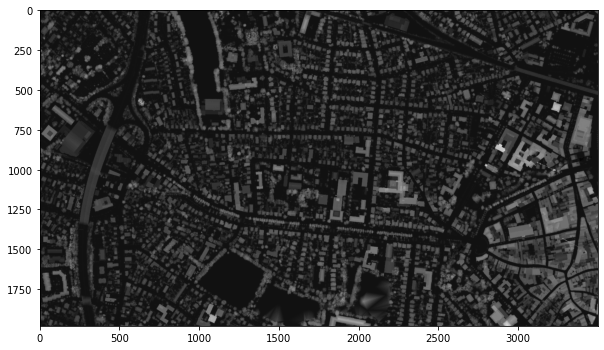

In [22]:
# Höhenmeter-Bild aus einzelner Datei
view = imshow(arr_dom, figsize=(10,10))

In [23]:
# Höhenmeter-Bild aus einzelnem Band der zusammengeführten Datei
arr_new = img_new.load()

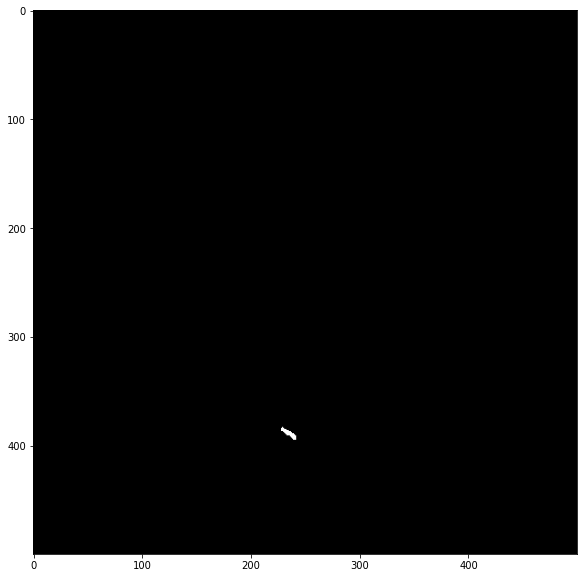

In [28]:
view = imshow(arr_new[:,:,108], figsize=(10,10))

ImageArray([[[ 6.]
             [ 5.]
             [ 4.]
             ...
             [ 0.]
             [ 0.]
             [ 0.]]

            [[ 7.]
             [ 6.]
             [ 4.]
             ...
             [ 0.]
             [ 0.]
             [ 0.]]

            [[ 8.]
             [ 7.]
             [ 5.]
             ...
             [ 0.]
             [ 0.]
             [ 0.]]

            ...

            [[11.]
             [12.]
             [13.]
             ...
             [ 2.]
             [ 1.]
             [ 1.]]

            [[11.]
             [13.]
             [13.]
             ...
             [ 1.]
             [ 0.]
             [ 0.]]

            [[12.]
             [13.]
             [13.]
             ...
             [ 1.]
             [ 0.]
             [ 0.]]], dtype=float32)

In [29]:
arr_new[50:55,50:55,108] - arr_dom[50:55,50:55,:]



ImageArray([[[ 6.5925    ]
             [ 5.986     ]
             [ 4.1295    ]
             ...
             [ 0.9790001 ]
             [ 0.6129999 ]
             [ 0.24699974]]

            [[ 7.44475   ]
             [ 6.73      ]
             [ 4.9764996 ]
             ...
             [ 0.83599997]
             [ 0.6589999 ]
             [ 0.48199987]]

            [[ 8.297     ]
             [ 7.474     ]
             [ 5.8234997 ]
             ...
             [ 0.69299984]
             [ 0.7049999 ]
             [ 0.717     ]]

            ...

            [[11.83175   ]
             [12.893001  ]
             [13.1485    ]
             ...
             [ 2.3204997 ]
             [ 1.9079999 ]
             [ 1.4955001 ]]

            [[11.7725    ]
             [13.370001  ]
             [13.449001  ]
             ...
             [ 1.9249997 ]
             [ 0.9819999 ]
             [ 0.03900003]]

            [[12.472     ]
             [13.864     ]
             [13.52425  